In [2]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib as Path

# Load dataset
base_dir = Path.Path.cwd()
data_path = base_dir / 'Customer-Churn-Records.csv'

# Read CSV file
df = pd.read_csv(data_path)
print("Dataset loaded successfully.")


Dataset loaded successfully.


In [ ]:
# Cell 2: Load Dataset Overview
print("\n Dataset Snippet:")
display(df.head())

print("\n Summary Statistics:")
display(df.describe(include='all').transpose())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:")
print(df.duplicated().sum())



 Dataset Snippet:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425



 Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0



Missing Values:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Duplicate Rows:
0


Dataset shape: (10000, 18)

Unique Categories:
Surname: 2932 unique values
Geography: 3 unique values
Gender: 2 unique values
Card Type: 4 unique values

Target Variable ('Exited') Distribution
Exited
0    7962
1    2038
Name: count, dtype: int64
Exited
0    79.62
1    20.38
Name: proportion, dtype: float64


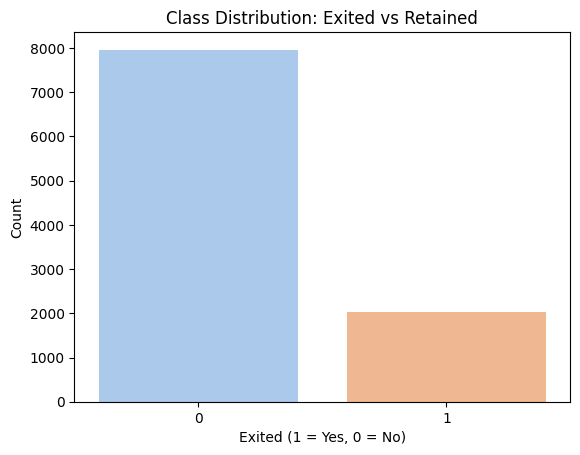

In [ ]:
# Cell 3: Data Understanding
# 1. General shape and basic metadata
print(f"Dataset shape: {df.shape}")

# 2. Check unique values for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("\nUnique Categories:")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# 3. Check class imbalance in the target variable
print("\nTarget Variable ('Exited') Distribution")
print(df['Exited'].value_counts())
print(df['Exited'].value_counts(normalize=True) * 100)

# 4. Visualize target imbalance
sns.countplot(data=df, x='Exited', hue='Exited', palette='pastel', legend=False)
plt.title('Class Distribution: Exited vs Retained')
plt.xlabel('Exited (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


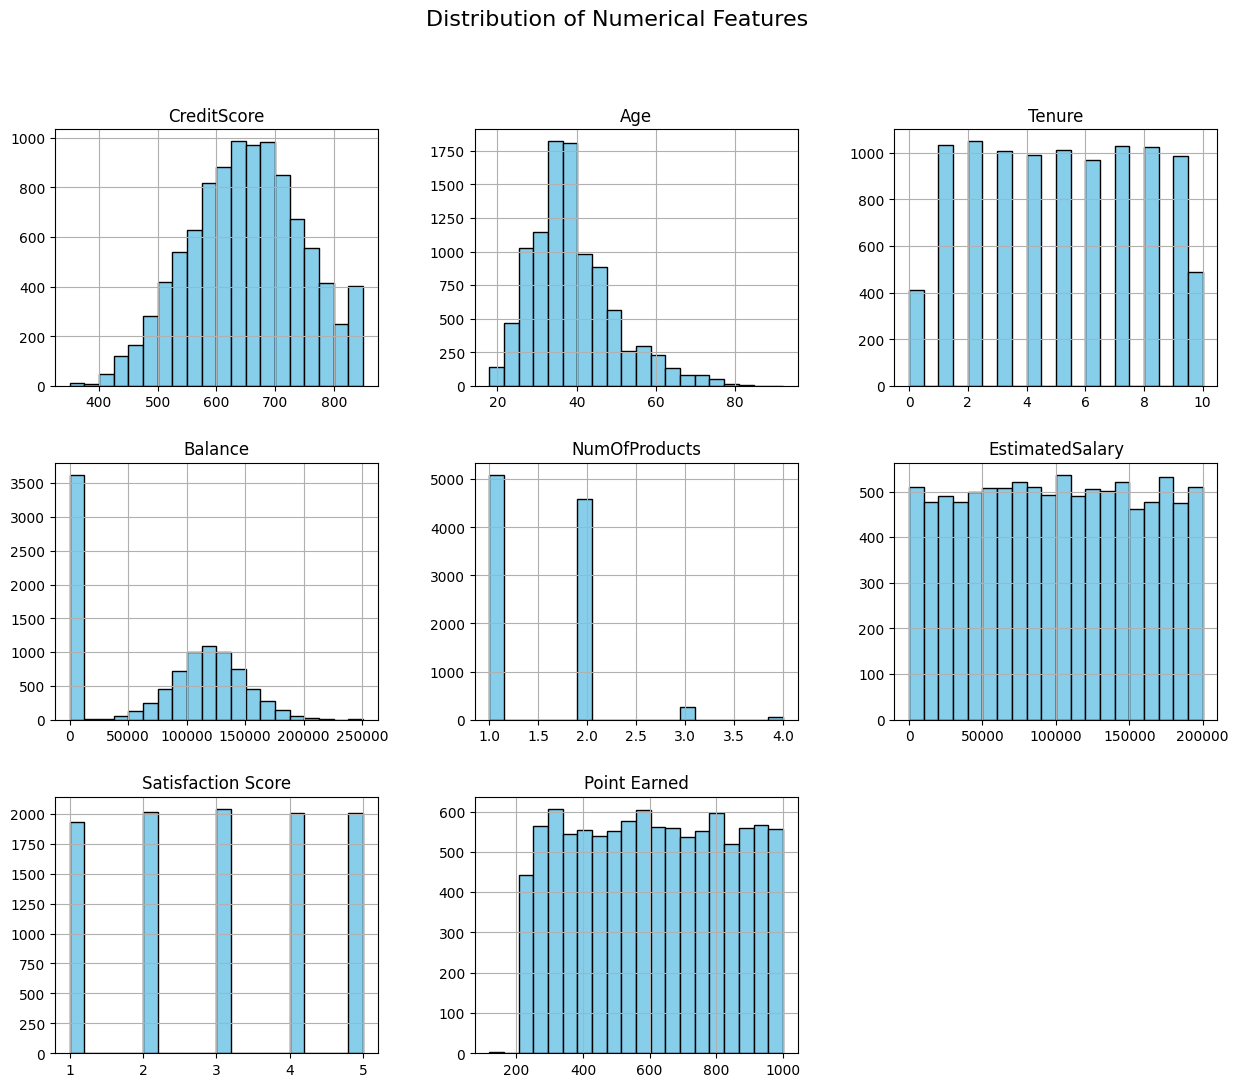

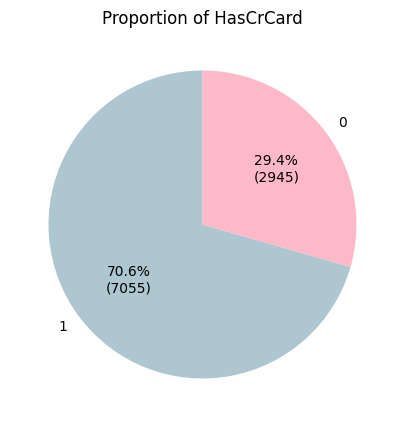

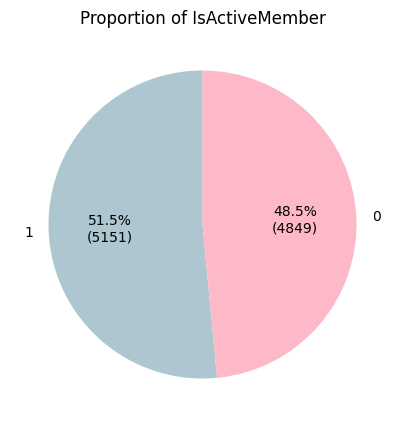

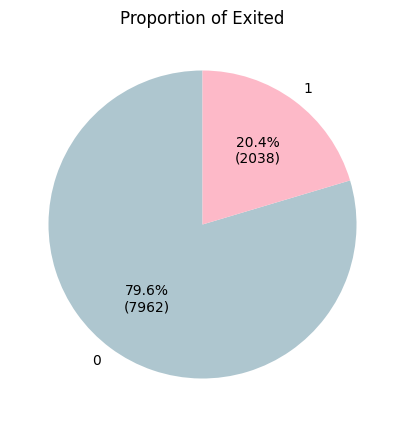

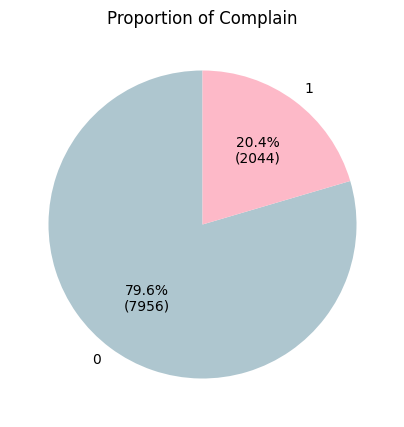

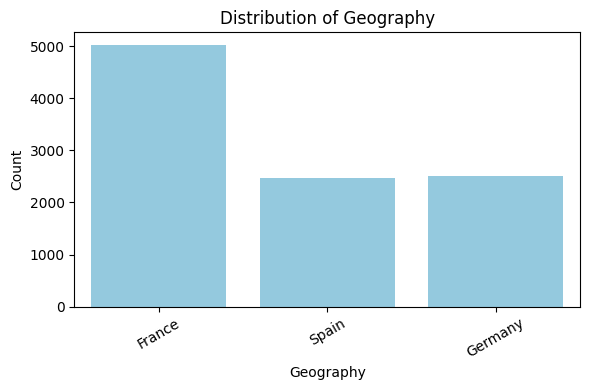

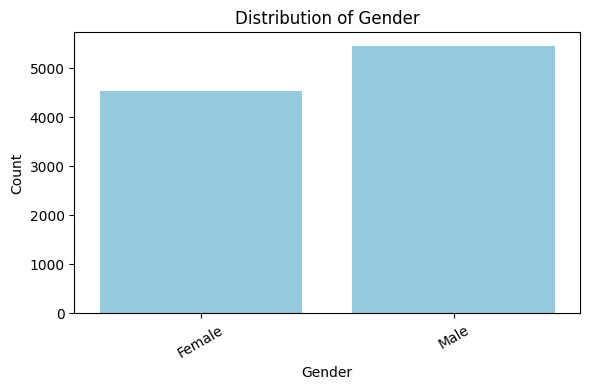

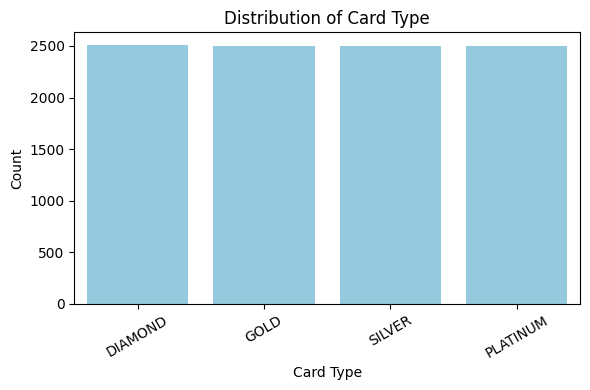

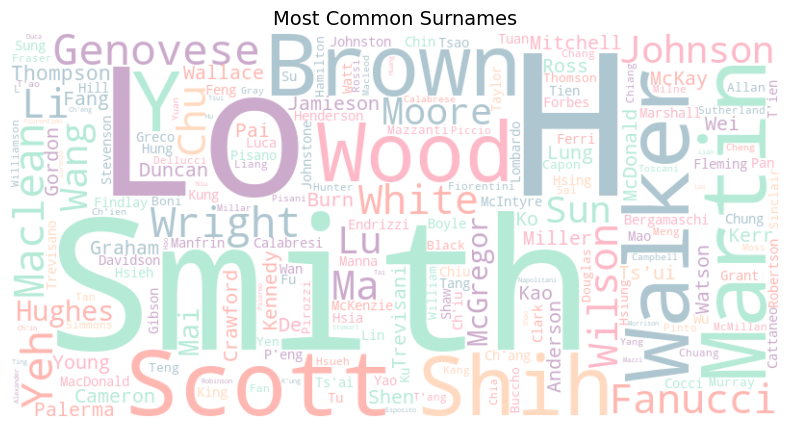

In [12]:
# Cell 4: Univariate Visualization
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

# Column Separation
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Drop irrelevant numeric identifiers and boolean-like numeric columns
bool_cols = ['HasCrCard', 'IsActiveMember', 'Exited', 'Complain']
num_cols = [c for c in num_cols if c not in ['RowNumber', 'CustomerId'] + bool_cols]

# Numerical Feature Distributions (Histogram)
df[num_cols].hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

# Boolean Columns (Pie Charts with Counts + Percentages)
for col in bool_cols:
    plt.figure(figsize=(5, 5))
    values = df[col].value_counts()
    
    def autopct_func(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    
    plt.pie(
        values, 
        labels=values.index, 
        autopct=autopct_func, 
        startangle=90, 
        colors=['#aec6cf', '#fdb9c8']  # pastel blue & pink
    )
    plt.title(f'Proportion of {col}')
    plt.show()

# Other Categorical Columns
other_cat_cols = [c for c in cat_cols if c not in ['Surname']]
for col in other_cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Word Cloud for Surname Column
surname_text = ' '.join(df['Surname'].dropna().astype(str))

# Custom color function
def pastel_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#aec6cf', '#fdb9c8', '#cbaacb', '#b5ead7', '#ffdac1', '#ffb7b2']
    return np.random.choice(colors)

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white',
    color_func=pastel_color_func,
    max_words=200,
    collocations=False
).generate(surname_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Surnames', fontsize=14)
plt.show()


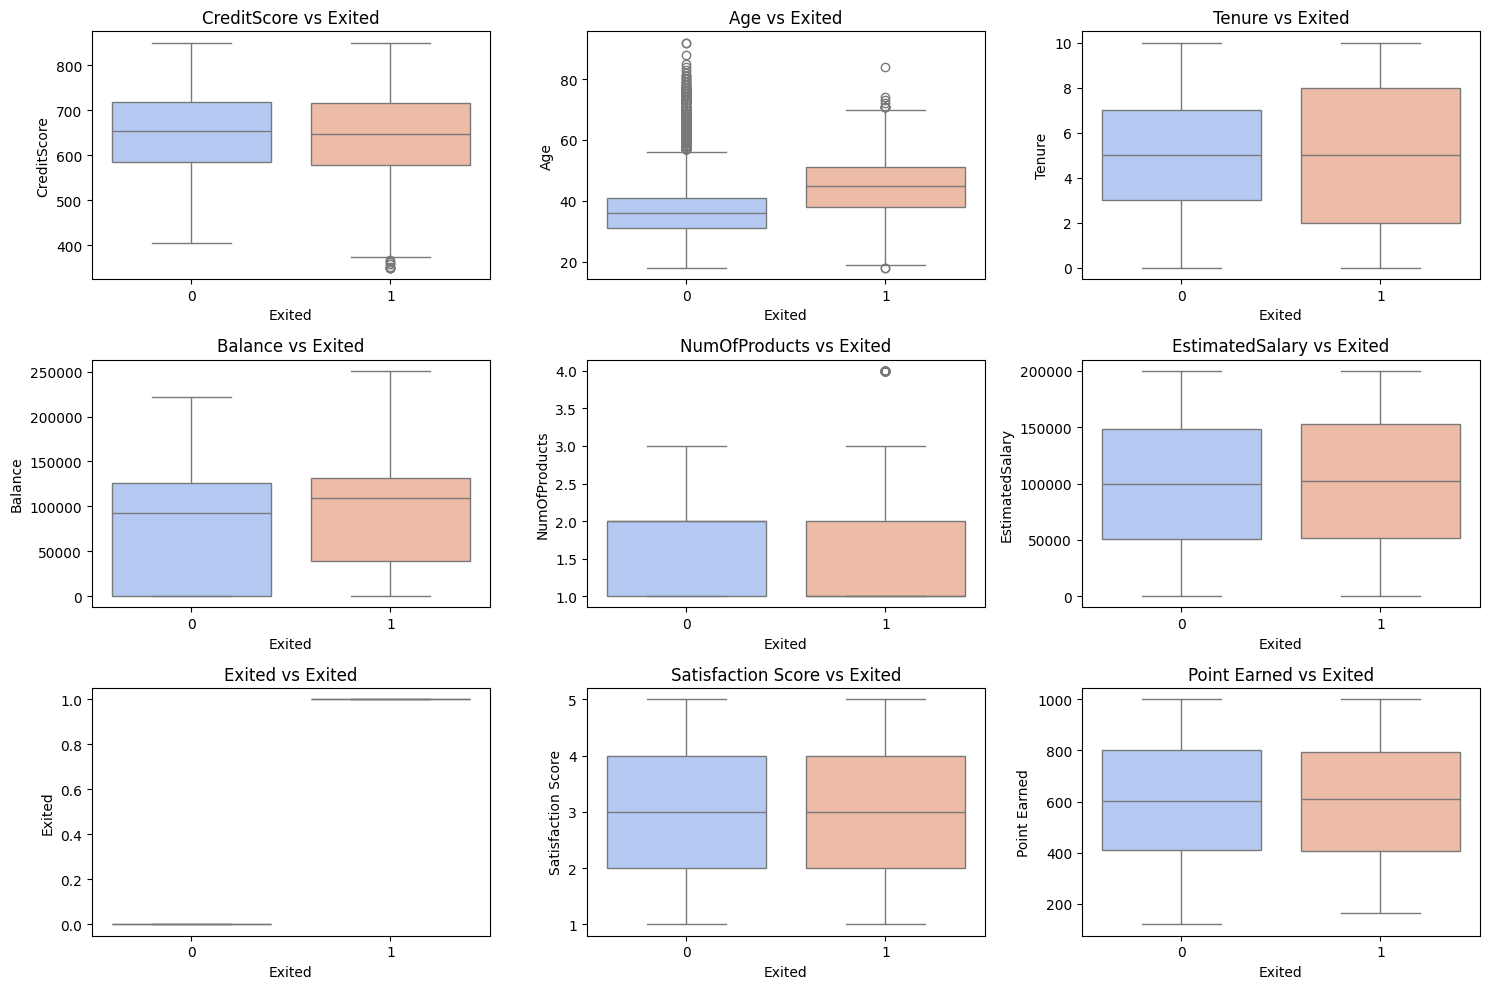

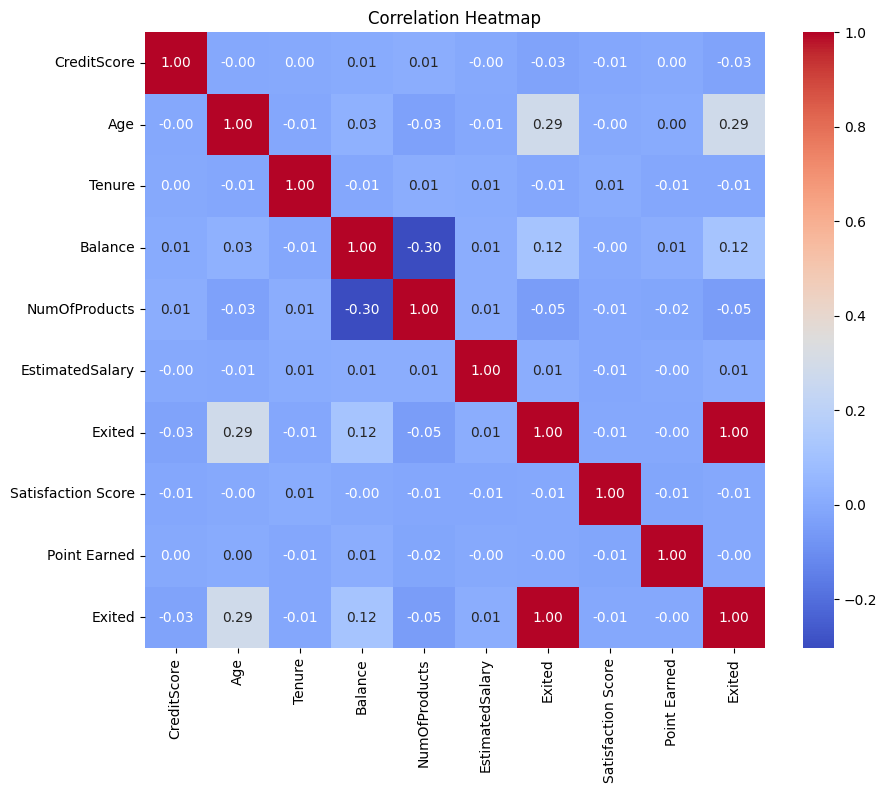

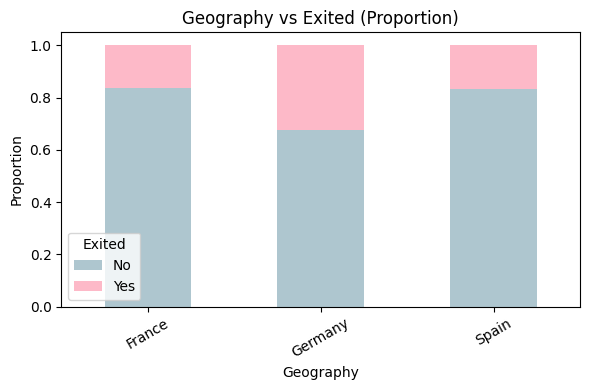

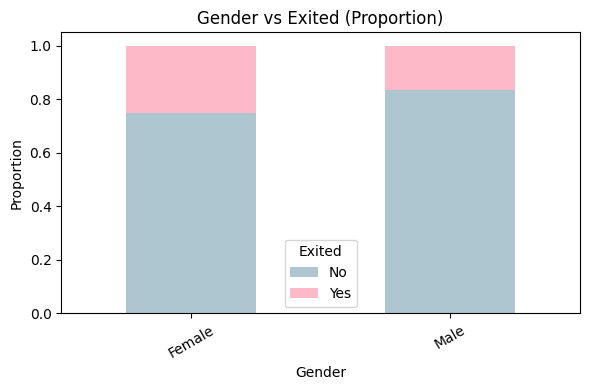

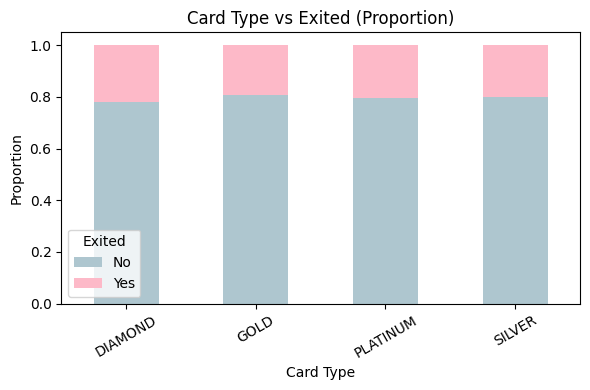

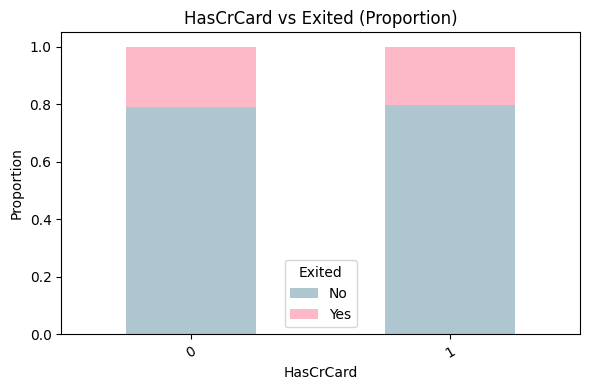

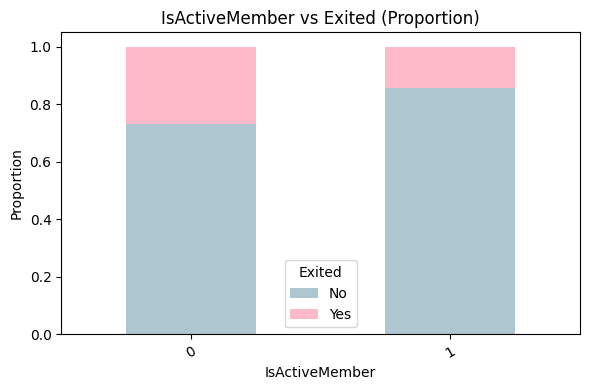

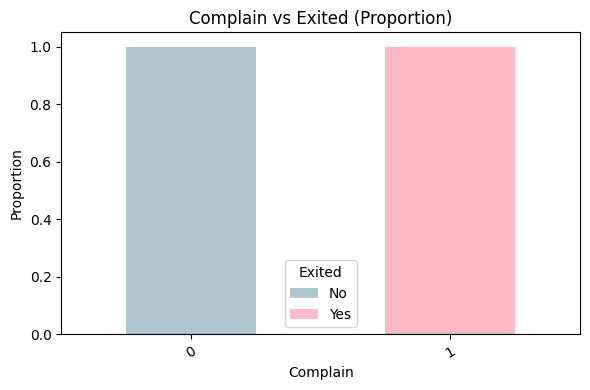

In [11]:
# Cell 5: Bivariate Analysis 
# Identify numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Remove identifiers and boolean-like fields
num_cols = [c for c in num_cols if c not in ['RowNumber', 'CustomerId', 'HasCrCard', 'IsActiveMember', 'Complain']]

# Numeric Features vs Target (Exited)
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='Exited', y=col, hue='Exited', legend=False, palette='coolwarm')
    plt.title(f'{col} vs Exited')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[num_cols + ['Exited']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Categorical vs Churn (Stacked Bar Plot)
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Removing 'Surname' (irrelevant)
cat_cols = [c for c in cat_cols if c != 'Surname']
bool_cols = ['HasCrCard', 'IsActiveMember', 'Complain']

for col in cat_cols + bool_cols:
    plt.figure(figsize=(6, 4))
    churn_crosstab = pd.crosstab(df[col], df['Exited'], normalize='index')
    churn_crosstab.plot(
        kind='bar', stacked=True, color=['#aec6cf', '#fdb9c8'], ax=plt.gca()
    )
    plt.title(f'{col} vs Exited (Proportion)')
    plt.ylabel('Proportion')
    plt.xticks(rotation=30)
    plt.legend(title='Exited', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()


In [ ]:
# Cell 6: Preprocessing (Before Split) 
from sklearn.preprocessing import LabelEncoder

# 1. Drop irrelevant columns
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_clean = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# 2. Check missing values
print("Missing values per column:\n", df_clean.isnull().sum())

# 3. Encode categorical variables
cat_cols = df_clean.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])

print("\nCategorical columns encoded successfully.")
print("Encoded columns:", cat_cols)

# 4. Identify numeric columns 
num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
num_cols = [c for c in num_cols if c not in ['Exited', 'HasCrCard', 'IsActiveMember', 'Complain']]

print("\nNumeric columns selected for scaling:\n", num_cols)

# 5. Basic statistical check before split
print("\nSummary statistics after encoding:")
display(df_clean.describe())


Missing values per column:
 CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Categorical columns encoded successfully.
Encoded columns: ['Geography', 'Gender', 'Card Type']

Numeric columns selected for scaling:
 ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Card Type', 'Point Earned']

Summary statistics after encoding:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,1.498000,606.515100
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,1.118356,225.924839
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,0.000000,119.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,0.000000,410.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,1.000000,605.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,2.000000,801.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,3.000000,1000.000000


Train set: (8000, 14), Test set: (2000, 14)


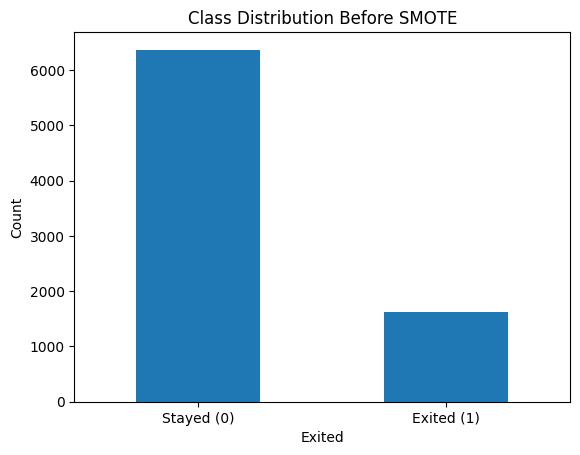

After SMOTE, training set size: (12740, 14)


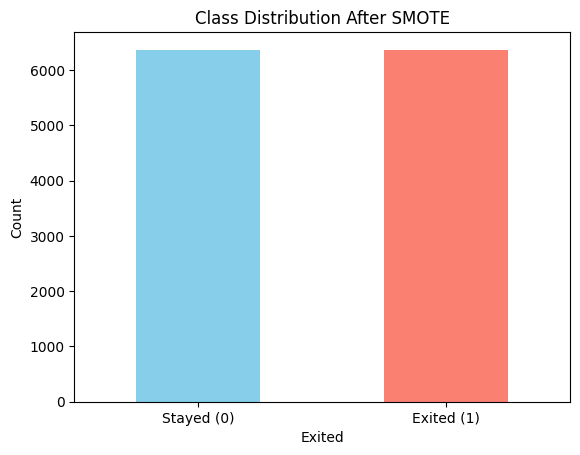


Numeric features normalized successfully.

Preprocessing complete and data balanced.


In [14]:
# Cell 7: Split, SMOTE, Normalize, and Visualize Balance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1. Split features and target
X = df_clean.drop(columns=['Exited'])
y = df_clean['Exited']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# 3. Visualize class imbalance before SMOTE
fig, ax = plt.subplots()
y_train.value_counts().sort_index().plot(kind='bar', ax=ax)
ax.set_xticklabels(['Stayed (0)', 'Exited (1)'], rotation=0)
ax.set_title('Class Distribution Before SMOTE')
ax.set_ylabel('Count')
plt.show()

# 4. Apply SMOTE to training set only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(f"After SMOTE, training set size: {X_train_res.shape}")

# 5. Visualize balanced data after SMOTE
fig, ax = plt.subplots()
y_train_res.value_counts().sort_index().plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])
ax.set_xticklabels(['Stayed (0)', 'Exited (1)'], rotation=0)
ax.set_title('Class Distribution After SMOTE')
ax.set_ylabel('Count')
plt.show()

# 6. Normalize numerical columns
scaler = StandardScaler()

# Ensure numeric columns exist before scaling
if len(num_cols) > 0:
    X_train_res[num_cols] = scaler.fit_transform(X_train_res[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    print("\nNumeric features normalized successfully.")
else:
    print("\nNo numeric columns detected for scaling.")

# 7. Final confirmation
print("\nPreprocessing complete and data balanced.")


In [15]:
# Cell 8: Save Final Split and Cleaned Data
from pathlib import Path

# Combine X and y
train_final = X_train_res.copy()
train_final['Exited'] = y_train_res

test_final = X_test.copy()
test_final['Exited'] = y_test

# Define file paths
train_path = base_dir / 'train_final.csv'
test_path = base_dir / 'test_final.csv'

# Save to CSV
train_final.to_csv(train_path, index=False)
test_final.to_csv(test_path, index=False)

print(f"Final cleaned and split datasets saved successfully!\n")
print(f"Train file: {train_path}\nTest file:  {test_path}")


Final cleaned and split datasets saved successfully!

Train file: c:\Users\18kyu\Desktop\Unishit\ODL\ODL_Assignment\train_final.csv
Test file:  c:\Users\18kyu\Desktop\Unishit\ODL\ODL_Assignment\test_final.csv
